## Importing Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sb
import pandas as pd

## Reading Some Graphs

In [3]:
gRoadNetCa = nx.read_edgelist('./roadNet-CA.txt', comments="#", delimiter="\t", create_using=nx.Graph())
gRoadNetTx = nx.read_edgelist('./roadNet-TX.txt', comments='#', delimiter='\t', create_using=nx.Graph())

## Node Degree

The node degree corresponds to the amount of neighbors that is linked to a node. It varies according to the following two properties:
* Undirected Graph: Is the amount of edges that connect a node $k_{i}$ to its neighbors.
* Directed Graph: Is the amount of incoming and outgoing edges of a Node. Thus the degree of a node is $k_i=k_{i}^{out}+k_{i}^{in}$.

To retrieve the degree of each node is quite simple using networkx, the only thing necessary is to call the built-in function `networkx.degree()` in the library. The functin receives as argument a graph and as a result returns a dictionary containing the degree of each node.


In [4]:
degreeCa = pd.DataFrame(pd.Series(nx.degree(gRoadNetCa)), columns=["Degree"])
degreeTx = pd.DataFrame(pd.Series(nx.degree(gRoadNetTx)), columns=["Degree"])

In [5]:
degreeCa.index = [x for x in range(0, len(degreeCa), 1)]
degreeTx.index = [x for x in range(0, len(degreeTx), 1)]

IndexError: single positional indexer is out-of-bounds

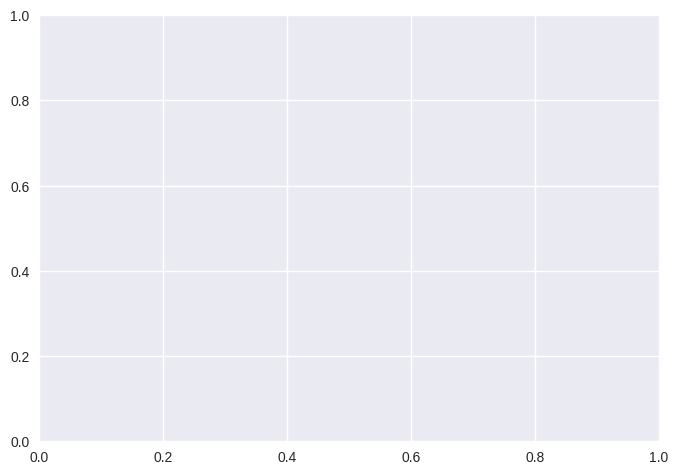

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sb.kdeplot(degreeCa['Degree'], normed=True)

In [ ]:
plt